# Graph Watch  : Extracting  Data from Line Graph

###### Importing  Python libraries  Numpy , matplotlib pandas

In [1]:
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as datetime
import calendar

###### Importing sklearn libraries

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from keras import metrics

/Users/Ram/anaconda/envs/Python3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Ram/anaconda/envs/Python3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


##### Load training data images 

In [4]:
X_train_data = []
y_trend =[]
y_month  =[]
y_startindex = []
y_endindex = []
def load_training_data():
    for min_range in range(1,20000):
        train_image = image.load_img('/trainindata/figure{}.png'.format(min_range),
                                     target_size = (32, 32))
        train_image = image.img_to_array(train_image)
        X_train_data.append(train_image)

In [5]:
load_training_data()

In [8]:
X_train_data[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

###### Load the labels 

In [6]:
y_trend=np.genfromtxt("/trainindata/y_trend.txt",dtype='str')
y_month=np.loadtxt("/trainindata/y_month.txt",dtype='str')
y_start=np.genfromtxt("/trainindata/y_start.txt")
y_end=np.loadtxt("/trainindata/y_end.txt")

In [7]:
y_trend[1950:2050]

array(['Upward', 'Upward', 'Upward', 'Upward', 'Upward', 'Upward',
       'Upward', 'Upward', 'Upward', 'Upward', 'Upward', 'Upward',
       'Upward', 'Upward', 'Upward', 'Upward', 'Upward', 'Upward',
       'Upward', 'Upward', 'Upward', 'Upward', 'Upward', 'Upward',
       'Upward', 'Upward', 'Upward', 'Upward', 'Upward', 'Upward',
       'Upward', 'Upward', 'Upward', 'Upward', 'Upward', 'Upward',
       'Upward', 'Upward', 'Upward', 'Upward', 'Upward', 'Upward',
       'Upward', 'Upward', 'Upward', 'Upward', 'Upward', 'Upward',
       'Upward', 'Upward', 'Downward', 'Downward', 'Downward', 'Downward',
       'Downward', 'Downward', 'Downward', 'Downward', 'Downward',
       'Downward', 'Downward', 'Downward', 'Downward', 'Downward',
       'Downward', 'Downward', 'Downward', 'Downward', 'Downward',
       'Downward', 'Downward', 'Downward', 'Downward', 'Downward',
       'Downward', 'Downward', 'Downward', 'Downward', 'Downward',
       'Downward', 'Downward', 'Downward', 'Downward',

In [8]:
y_month[9950:10050]

array(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February

In [9]:
y_start[9950:10050]

array([20042.5, 20040.5, 20040.5, 20042.5, 20041.5, 20041.5, 20043.5,
       20041.5, 20041.5, 20043.5, 20040.5, 20043.5, 20041.5, 20043.5,
       20041.5, 20043.5, 20041.5, 20041.5, 20042.5, 20043.5, 20041.5,
       20043.5, 20041.5, 20042.5, 20043.5, 20042.5, 20041.5, 20043.5,
       20042.5, 20042.5, 20042.5, 20043.5, 20042.5, 20043.5, 20040.5,
       20041.5, 20043.5, 20041.5, 20040.5, 20043.5, 20041.5, 20042.5,
       20043.5, 20043.5, 20040.5, 20043.5, 20041.5, 20042.5, 20040.5,
       20041.5, 19857.5, 19856.5, 19856.5, 19859.5, 19856.5, 19859.5,
       19859.5, 19859.5, 19859.5, 19857.5, 19858.5, 19858.5, 19858.5,
       19856.5, 19857.5, 19858.5, 19857.5, 19856.5, 19856.5, 19859.5,
       19859.5, 19859.5, 19858.5, 19859.5, 19858.5, 19859.5, 19859.5,
       19856.5, 19857.5, 19856.5, 19856.5, 19859.5, 19857.5, 19858.5,
       19859.5, 19856.5, 19857.5, 19857.5, 19857.5, 19856.5, 19859.5,
       19857.5, 19856.5, 19858.5, 19857.5, 19856.5, 19857.5, 19857.5,
       19858.5, 1985

In [10]:
y_end[9950:10050]

array([20013.5, 20009.5, 20008.5, 20002.5, 20003.5, 20029.5, 20013.5,
       20009.5, 20018.5, 20030.5, 20018.5, 20003.5, 19999.5, 20027.5,
       20024.5, 20006.5, 20019.5, 20003.5, 19996.5, 20024.5, 20003.5,
       20024.5, 20006.5, 19995.5, 19994.5, 20018.5, 20012.5, 20010.5,
       19997.5, 20015.5, 20027.5, 20004.5, 20001.5, 20002.5, 20011.5,
       20015.5, 20001.5, 20008.5, 20006.5, 20003.5, 20000.5, 20031.5,
       20004.5, 20016.5, 20021.5, 20006.5, 20010.5, 20011.5, 20004.5,
       20003.5, 19952. , 19944. , 19951. , 19961. , 19949. , 19956. ,
       19950. , 19960. , 19966. , 19943. , 19950. , 19952. , 19944. ,
       19940. , 19963. , 19932. , 19946. , 19954. , 19950. , 19945. ,
       19959. , 19966. , 19960. , 19922. , 19950. , 19960. , 19957. ,
       19957. , 19952. , 19935. , 19943. , 19983. , 19956. , 19947. ,
       19966. , 19981. , 19932. , 19937. , 19968. , 19955. , 19946. ,
       19967. , 19930. , 19966. , 19953. , 19947. , 19952. , 19965. ,
       19953. , 1994

###### Split the data on index train data and test data

In [11]:
splits = 1
shufflesplit = StratifiedShuffleSplit(n_splits=splits, random_state=42, test_size=5000)
print("Shuffle Split")
for train_index, test_index in shufflesplit.split(X_train_data,y_trend):
    print("Split is done")

Shuffle Split
Split is done


###### Month and Trend are the two labels. We will apply encoder and do one hot encoding

In [12]:
# month encoding
monthEncoder = LabelEncoder()
monthEncoder.fit(y_month)
encoded_Y_month = monthEncoder.transform(y_month)
encoded_Y_month = to_categorical(encoded_Y_month)

In [13]:
encoded_Y_month[9990:10010]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [14]:
# trend encoding
trendEncoder = LabelEncoder()
trendEncoder.fit(y_trend)
encoded_Y_trend = trendEncoder.transform(y_trend)
encoded_Y_trend = to_categorical(encoded_Y_trend)

In [15]:
encoded_Y_trend[9990:10010]

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

###### Transforms Start and end index by scaling 

In [16]:
startScalar = MinMaxScaler()
startScalar.fit(y_start.reshape(-1,1))
encoded_Y_start = startScalar.transform(y_start.reshape(-1,1))


In [17]:
encoded_Y_start[9910:9920]

array([[0.65202703],
       [0.65202703],
       [0.65540541],
       [0.66216216],
       [0.65540541],
       [0.66216216],
       [0.65878378],
       [0.65540541],
       [0.66216216],
       [0.65202703]])

In [18]:
endScalar = MinMaxScaler()
endScalar.fit(y_end.reshape(-1,1))
encoded_Y_end = endScalar.transform(y_end.reshape(-1, 1))


In [19]:
encoded_Y_end[4500:4510]

array([[0.15284553],
       [0.19512195],
       [0.14308943],
       [0.1300813 ],
       [0.11707317],
       [0.10081301],
       [0.12357724],
       [0.17886179],
       [0.15284553],
       [0.12357724]])

### Get Training and Test data based on split index

In [20]:
X_train_input = np.asarray(X_train_data)

X_train = np.asarray(X_train_input[train_index]).transpose(0,3,2,1)
X_test = np.asarray(X_train_input[test_index]).transpose(0,3,2,1)
#trend
y_trend_train =  np.asarray(encoded_Y_trend[train_index])
y_trend_test =  np.asarray(encoded_Y_trend[test_index])

# month
y_month_train =  np.asarray(encoded_Y_month[train_index])
y_month_test =  np.asarray(encoded_Y_month[test_index])
#start
y_start_train =  np.asarray(encoded_Y_start.reshape(-1,1)[train_index])
y_start_test =  np.asarray(encoded_Y_start.reshape(-1,1)[test_index])
#end
y_end_train =  np.asarray(encoded_Y_end.reshape(-1,1)[train_index])
y_end_test =  np.asarray(encoded_Y_end.reshape(-1,1)[test_index])


#### Build the  Keras Functional Model  which has multiple outputs with multiple loss functions and metrics


###### Model with Adam Optimizer

In [21]:
input_img = Input((3,32,32))
output_layer_img = Conv2D(32, (3, 3), input_shape=(3,32,32), activation='relu', padding='same')(input_img)
output_layer_img = Dropout(0.2)(output_layer_img)
output_layer_img = Conv2D(32, (3, 3), activation='relu', padding='same')(output_layer_img)
output_layer_img = MaxPooling2D(pool_size=(2, 2))(output_layer_img)
output_layer_img = Conv2D(64, (3, 3),  activation='relu', padding='same')(output_layer_img)
output_layer_img = Dropout(0.2)(output_layer_img)
output_layer_img = Conv2D(64, (3, 3),  activation='relu', padding='same')(output_layer_img)
output_layer_img = Conv2D(128, (3, 3),  activation='relu', padding='same')(output_layer_img)
output_layer_img = Flatten()(output_layer_img)
output_layer_img = Dropout(0.2)(output_layer_img)
output_layer_img = Dense(1024, activation='relu')(output_layer_img)
output_layer_img = Dropout(0.2)(output_layer_img)
output_layer_img = Dense(512, activation='relu')(output_layer_img)
output_layer_img = Dropout(0.2)(output_layer_img)
y_start_output = Dense(1, name='start', activation='sigmoid')(output_layer_img)
y_end_output= Dense(1, name='end', activation='sigmoid')(output_layer_img)
y_trend_output = Dense(5, activation='softmax', name='trend')(output_layer_img)
y_month_output = Dense(2, activation='softmax', name='month')(output_layer_img)

model = Model([input_img], [y_start_output,y_end_output,y_trend_output,y_month_output])

adamOptimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# compile the model with  multiple loss functions and metric
model.compile(optimizer= adamOptimizer, loss={'start':'mse','end':'mse', 'trend':'categorical_crossentropy',
                                              'month':'binary_crossentropy'}, 
             metrics={'start':'mse','end':'mse','trend':'accuracy','month':'binary_accuracy'},
       loss_weights=[0.001,0.001, 1.,1.]) #adjust loss-Weights 


In [22]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 32, 32)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 3, 32, 32)    9248        input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 3, 32, 32)    0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 3, 32, 32)    9248        dropout_1[0][0]                  
__________________________________________________________________________________________________
max_poolin

###### Fit the model

In [23]:
history = model.fit(X_train, [y_start_train,y_end_train,y_trend_train,y_month_train], batch_size=200, epochs=10, 
       validation_data=(X_test, [y_start_test,y_end_test,y_trend_test,y_month_test]))

Train on 14999 samples, validate on 5000 samples
Epoch 1/10
14999/14999 [==============================] - 11s 731us/step - loss: 2.7496 - start_loss: 0.1980 - end_loss: 0.0854 - trend_loss: 2.0089 - month_loss: 0.7404 - start_mean_squared_error: 0.1980 - end_mean_squared_error: 0.0854 - trend_acc: 0.2013 - month_binary_accuracy: 0.7348 - val_loss: 1.6197 - val_start_loss: 0.1600 - val_end_loss: 0.0651 - val_trend_loss: 1.6188 - val_month_loss: 7.1779e-04 - val_start_mean_squared_error: 0.1600 - val_end_mean_squared_error: 0.0651 - val_trend_acc: 0.1936 - val_month_binary_accuracy: 1.0000
Epoch 2/10
14999/14999 [==============================] - 11s 727us/step - loss: 1.6214 - start_loss: 0.1601 - end_loss: 0.0655 - trend_loss: 1.6113 - month_loss: 0.0098 - start_mean_squared_error: 0.1601 - end_mean_squared_error: 0.0655 - trend_acc: 0.2265 - month_binary_accuracy: 0.9991 - val_loss: 1.6179 - val_start_loss: 0.1576 - val_end_loss: 0.0639 - val_trend_loss: 1.6168 - val_month_loss: 8.83

##### Prediction

In [24]:
X_predict=[]

train_image = image.load_img('/trainindata/figure444.png', target_size = (32, 32))
train_image = image.img_to_array(train_image)

X_predict.append(train_image)
X_predict_reshaped = np.asarray(X_predict).transpose(0,3,2,1)
y_predict= model.predict(np.asarray(X_predict_reshaped))
print(y_predict)

[array([[0.06935138]], dtype=float32), array([[0.41755134]], dtype=float32), array([[0.01357748, 0.03189572, 0.04621665, 0.8240771 , 0.08423312]],
      dtype=float32), array([[4.5605263e-04, 9.9954396e-01]], dtype=float32)]


In [3]:
%%html
<img src="images/figure444.png",width=60,height=60>

###### Predicted Trend

In [26]:
y_trend = np.argmax(y_predict[2])
y_trend_result = trendEncoder.inverse_transform(y_trend)
y_trend_result

'Upward'

###### Predicted Month

In [27]:
y_month = np.argmax(y_predict[3])
y_month_result = monthEncoder.inverse_transform(y_month)
y_month_result

'January'

###### Predicted Start Index

In [28]:
y_pred_start = np.argmax(y_predict[0])
y_start_result =startScalar.inverse_transform(y_pred_start)
y_start_result

array([[19847.5]])

###### Actual Start Index

In [31]:
y_start[443]

19857.5

###### Predicted End Index

In [30]:
y_end_result =endScalar.inverse_transform(y_predict[1])
y_end_result

array([[19963.896]], dtype=float32)

###### Actual End Index

In [32]:
y_end[443]

19961.5

###### Actual Values

Trend : Upward

Month : January

Start Index : 19857

End Index : 19960

###### Predicted Values 

Trend : Upward

Month : January

Start Index : 19840

End Index : 19959

##### Accuracy Graphs

In [28]:
def display_graph(acc, val_acc,loss, val_loss):
    plt.clf()
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

###### Start Index Accuracy

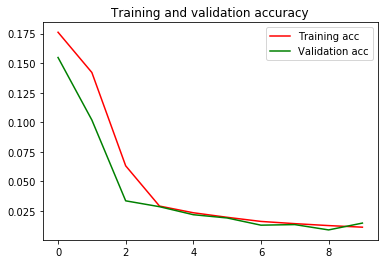

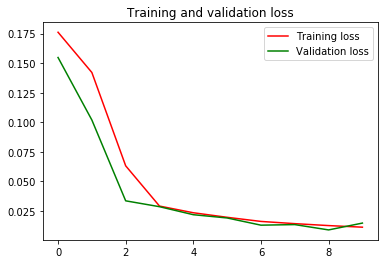

In [29]:
acc = history.history['start_mean_squared_error']
val_acc = history.history['val_start_mean_squared_error']
loss = history.history['start_loss']
val_loss = history.history['val_start_loss']

display_graph(acc, val_acc,loss, val_loss)

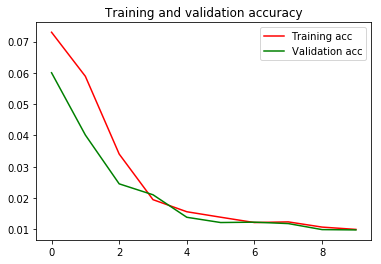

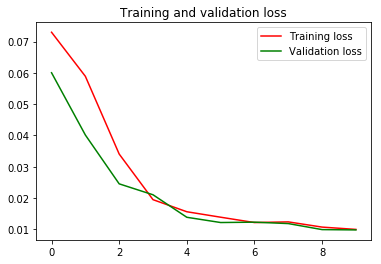

In [30]:
acc = history.history['end_mean_squared_error']
val_acc = history.history['val_end_mean_squared_error']
loss = history.history['end_loss']
val_loss = history.history['val_end_loss']

display_graph(acc, val_acc,loss, val_loss)

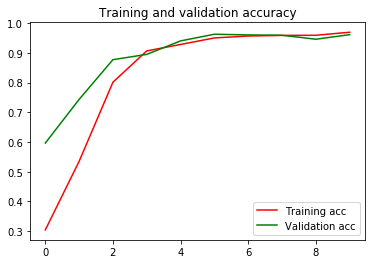

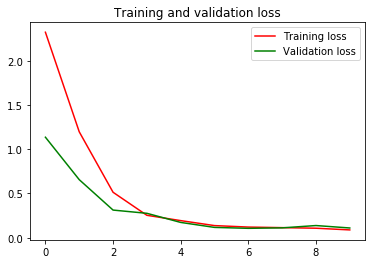

In [31]:
acc = history.history['trend_acc']
val_acc = history.history['val_trend_acc']
loss = history.history['trend_loss']
val_loss = history.history['val_trend_loss']

display_graph(acc, val_acc,loss, val_loss)

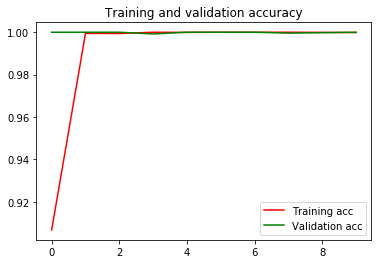

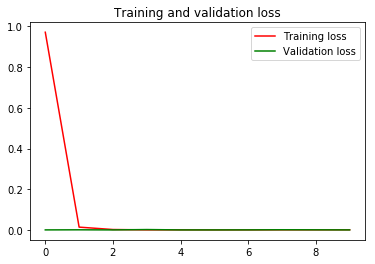

In [32]:
acc = history.history['month_binary_accuracy']
val_acc = history.history['val_month_binary_accuracy']
loss = history.history['month_loss']
val_loss = history.history['val_month_loss']

display_graph(acc, val_acc,loss, val_loss)

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
%%html
<img src="images/figure2444.png",width=60,height=60>

In [50]:
y_end_val = endScalar.inverse_transform(y_predict[1])[0][0]
y_end_result = np.around(y_end_val,decimals=2)
y_end_val

19951.2

In [33]:
X_predict=[]

train_image = image.load_img('/trainindata/figure2444.png', target_size = (32, 32))
train_image = image.img_to_array(train_image)

X_predict.append(train_image)
X_predict_reshaped = np.asarray(X_predict).transpose(0,3,2,1)
y_predict= model.predict(np.asarray(X_predict_reshaped))



y_trend = np.argmax(y_predict[2])
y_trend_result = trendEncoder.inverse_transform(y_trend)

y_month = np.argmax(y_predict[3])
y_month_result = monthEncoder.inverse_transform(y_month)

y_pred_start = np.argmax(y_predict[0])
y_start_result =startScalar.inverse_transform(y_pred_start)

y_end_val = endScalar.inverse_transform(y_predict[1])[0][0]
y_end_result = np.around(y_end_val,decimals=2)


print("In the month of {} , there is a {} trend from start index {} to end index {}".format(y_month_result,y_trend_result,y_start_result[0][0],
                                                                                            y_end_val))

In the month of January , there is a Downward trend from start index 19847.5 to end index 19880.17578125


/Users/Ram/anaconda/envs/Python3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Ram/anaconda/envs/Python3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
X_predict=[]

train_image = image.load_img('/trainindata/figure4444.png', target_size = (32, 32))
train_image = image.img_to_array(train_image)

X_predict.append(train_image)
X_predict_reshaped = np.asarray(X_predict).transpose(0,3,2,1)
y_predict= model.predict(np.asarray(X_predict_reshaped))



y_trend = np.argmax(y_predict[2])
y_trend_result = trendEncoder.inverse_transform(y_trend)

y_month = np.argmax(y_predict[3])
y_month_result = monthEncoder.inverse_transform(y_month)

y_pred_start = np.argmax(y_predict[0])
y_start_result =startScalar.inverse_transform(y_pred_start)

#y_pred_end = np.argmax(y_predict[1])
y_end_result = np.round(endScalar.inverse_transform(y_predict[1])[0][0], decimals=2)



print("In the month of {} , there is a {} trend from start index {} to end index {}".format(y_month_result,y_trend_result,y_start_result[0][0],
                                                                                            y_end_result))

In the month of January , there is a Nochange trend from start index 19847.5 to end index 19842.19921875


In [58]:
X_predict=[]

train_image = image.load_img('/trainindata/figure6444.png', target_size = (32, 32))
train_image = image.img_to_array(train_image)

X_predict.append(train_image)
X_predict_reshaped = np.asarray(X_predict).transpose(0,3,2,1)
y_predict= model.predict(np.asarray(X_predict_reshaped))



y_trend = np.argmax(y_predict[2])
y_trend_result = trendEncoder.inverse_transform(y_trend)

y_month = np.argmax(y_predict[3])
y_month_result = monthEncoder.inverse_transform(y_month)

y_pred_start = np.argmax(y_predict[0])
y_start_result =startScalar.inverse_transform(y_pred_start)

#y_pred_end = np.argmax(y_predict[1])
y_end_result = np.round(endScalar.inverse_transform(y_predict[1])[0][0], decimals=2)



print("In the month of {} , there is a {} trend from start index {} to end index {}".format(y_month_result,y_trend_result,y_start_result[0][0],
                                                                                            y_end_result))

In the month of January , there is a Upward trend from start index 19847.5 to end index 19960.8203125


In [36]:
X_predict=[]

train_image = image.load_img('/trainindata//figure8444.png', target_size = (32, 32))
train_image = image.img_to_array(train_image)

X_predict.append(train_image)
X_predict_reshaped = np.asarray(X_predict).transpose(0,3,2,1)
y_predict= model.predict(np.asarray(X_predict_reshaped))



y_trend = np.argmax(y_predict[2])
y_trend_result = trendEncoder.inverse_transform(y_trend)

y_month = np.argmax(y_predict[3])
y_month_result = monthEncoder.inverse_transform(y_month)

y_pred_start = np.argmax(y_predict[0])
y_start_result =startScalar.inverse_transform(y_pred_start)

#y_pred_end = np.argmax(y_predict[1])
y_end_result = np.round(endScalar.inverse_transform(y_predict[1])[0][0], decimals=2)



print("In the month of {} , there is a {} trend from start index {} to end index {}".format(y_month_result,y_trend_result,y_start_result[0][0],
                                                                                            y_end_result))

In the month of January , there is a DownwardUpward trend from start index 19847.5 to end index 19976.80078125


In [37]:
X_predict=[]

train_image = image.load_img('/trainindata/figure10444.png', target_size = (32, 32))
train_image = image.img_to_array(train_image)

X_predict.append(train_image)
X_predict_reshaped = np.asarray(X_predict).transpose(0,3,2,1)
y_predict= model.predict(np.asarray(X_predict_reshaped))



y_trend = np.argmax(y_predict[2])
y_trend_result = trendEncoder.inverse_transform(y_trend)

y_month = np.argmax(y_predict[3])
y_month_result = monthEncoder.inverse_transform(y_month)

y_pred_start = np.argmax(y_predict[0])
y_start_result =startScalar.inverse_transform(y_pred_start)

#y_pred_end = np.argmax(y_predict[1])
y_end_result = np.round(endScalar.inverse_transform(y_predict[1])[0][0], decimals=2)



print("In the month of {} , there is a {} trend from start index {} to end index {}".format(y_month_result,y_trend_result,y_start_result[0][0],
                                                                                            y_end_result))

In the month of February , there is a Upward trend from start index 19847.5 to end index 19942.619140625


In [38]:
X_predict=[]

train_image = image.load_img('/trainindata/figure16444.png', target_size = (32, 32))
train_image = image.img_to_array(train_image)

X_predict.append(train_image)
X_predict_reshaped = np.asarray(X_predict).transpose(0,3,2,1)
y_predict= model.predict(np.asarray(X_predict_reshaped))



y_trend = np.argmax(y_predict[2])
y_trend_result = trendEncoder.inverse_transform(y_trend)

y_month = np.argmax(y_predict[3])
y_month_result = monthEncoder.inverse_transform(y_month)

y_pred_start = np.argmax(y_predict[0])
y_start_result =startScalar.inverse_transform(y_pred_start)

#y_pred_end = np.argmax(y_predict[1])
y_end_result = np.round(endScalar.inverse_transform(y_predict[1])[0][0], decimals=2)



print("In the month of {} , there is a {} trend from start index {} to end index {}".format(y_month_result,y_trend_result,y_start_result[0][0],
                                                                                            y_end_result))

In the month of February , there is a UpwardDownward trend from start index 19847.5 to end index 19858.060546875


In [62]:
X_predict=[]

train_image = image.load_img('/trainindata/figure18444.png', target_size = (32, 32))
train_image = image.img_to_array(train_image)

X_predict.append(train_image)
X_predict_reshaped = np.asarray(X_predict).transpose(0,3,2,1)
y_predict= model.predict(np.asarray(X_predict_reshaped))



y_trend = np.argmax(y_predict[2])
y_trend_result = trendEncoder.inverse_transform(y_trend)

y_month = np.argmax(y_predict[3])
y_month_result = monthEncoder.inverse_transform(y_month)

y_pred_start = np.argmax(y_predict[0])
y_start_result =startScalar.inverse_transform(y_pred_start)

#y_pred_end = np.argmax(y_predict[1])
y_end_result = np.round(endScalar.inverse_transform(y_predict[1])[0][0], decimals=2)



print("In the month of {} , there is a {} trend from start index {} to end index {}".format(y_month_result,y_trend_result,y_start_result[0][0],
                                                                                            y_end_result))

In the month of February , there is a DownwardUpward trend from start index 19847.5 to end index 20102.19921875
